In [13]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist # dataset: 28x28 bilder av handskrivna siffror 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data() #Lägger in siffrorna i träning och test variablar

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential() #"feedforward model" ett linjärt nätverk
model.add(tf.keras.layers.Flatten()) #input-lager
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #hidden layer, 128 neuroner. Aktivationsfunktion = relu
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #ett till av ett likadant gömda-lager 
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #10 output-neuroner för 10 svar (0-9) 

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']) #adam som optimizer scc som loss-funktion

model.fit(x_train, y_train, epochs=10)

Epoch 1/3
60000/60000 [==============================] - 7s 114us/step - loss: 0.2583 - acc: 0.9240
Epoch 2/3
60000/60000 [==============================] - 6s 97us/step - loss: 0.1047 - acc: 0.9672
Epoch 3/3
60000/60000 [==============================] - 6s 95us/step - loss: 0.0721 - acc: 0.9772


In [11]:
val_loss, val_acc = model.evaluate(x_test, y_test) #Man ska hoppas på att modellen generaliserar hur olika siffror ser ut och inte momorizerar din specifika data.
print(val_loss, val_acc) #testar för overfitting

10000/10000 [==============================] - 0s 35us/step
0.08699274508273229 0.9738


In [5]:
import matplotlib.pyplot as plt #gör så jag kan se bilderna 
 
plt.imshow(x_train[0])
plt.show()
print(x_train[0])

<Figure size 640x480 with 1 Axes>

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [6]:
model.save('epic_num_reader.model')

In [7]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [8]:
predictions = new_model.predict([x_test])

In [9]:
print(predictions)

[[1.4505467e-09 1.5952155e-08 4.2525679e-07 ... 9.9988234e-01
  1.2114825e-09 5.1810339e-08]
 [2.1883784e-12 1.3089052e-05 9.9998474e-01 ... 5.4933985e-10
  5.6162914e-08 2.7213518e-12]
 [2.1599545e-08 9.9974376e-01 1.9772255e-05 ... 1.3824964e-04
  4.5355544e-05 4.0634697e-07]
 ...
 [2.9719138e-09 3.0847337e-07 2.5344167e-09 ... 5.8416863e-06
  1.5135088e-06 1.0950634e-05]
 [5.6035647e-06 1.8064202e-07 7.7789881e-09 ... 7.8182460e-08
  8.2374600e-06 2.5376174e-08]
 [1.5432497e-06 4.9234143e-07 7.6699689e-06 ... 2.3701906e-08
  2.0498699e-06 6.4288152e-08]]


In [10]:
import numpy as np

print(np.argmax(predictions[2]))

1


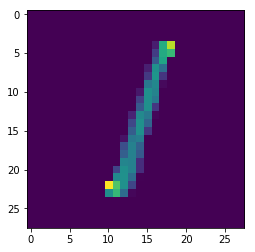

In [11]:
plt.imshow(x_test[2])
plt.show(2)